# Explore image classification with deep learning

**Step 1**: install and import necessary librarys

In [ ]:
!pip install -r ../requirements.txt

In [18]:
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # para imagenes
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # modelo secuencial que toma paso por paso para generar la arq
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten # Conv2D: Convolusion y centralizacion de la imagen. Dropout: La red no se memoriza la red entera.
# Flatten estira la matriz.
from tensorflow.keras.layers import Activation, BatchNormalization #Funcion de activacion
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow.keras import datasets, layers, models
from keras.utils import load_img 
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory
# Save model
import pickle

**Step 2**: unzip cats and dogs images

In [ ]:
!unzip ../data/raw/Cat.zip
!mv ResizedCat Cat

In [ ]:
!unzip ../data/raw/Dog.zip
!mv ResizedDog Dog

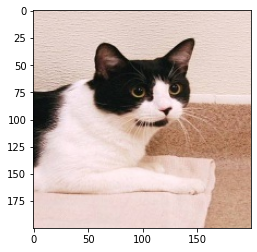

In [6]:
# Sample a cat image
sample_cat = mpimg.imread('Cat/image3814.jpg') # imread permite ver la imagen
plt.imshow(sample_cat)
plt.show()

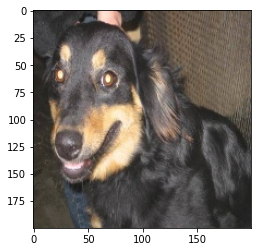

In [7]:
# Sample a dog image
sample_dog = mpimg.imread('Dog/image8941.jpg')
plt.imshow(sample_dog)
plt.show()

In [8]:
# Count total images
data_dir = pathlib.Path('./')
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

25000

**Step 3**: define train and validation samples

In [9]:
# Let's follow this tutorial: https://www.tensorflow.org/tutorials/load_data/images
# Create train dataset
IMAGE_WIDTH = 200
IMAGE_HEIGHT = 200
BATCH_SIZE = 32 

train_ds = tf.keras.utils.image_dataset_from_directory( # image dataset from directory nombra cada elemento con el nombre de la carpeta
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


2022-08-13 17:58:19.948218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-13 17:58:19.948261: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-13 17:58:19.948284: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anasofiasam-deeplearnin-ng7zcufvhhd): /proc/driver/nvidia/version does not exist
2022-08-13 17:58:19.948569: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Create validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [11]:
# Read the classes
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


**Step 4:** Create the deep learning architecture and fit the model

In [12]:
# resnet architecture https://medium.com/analytics-vidhya/understanding-resnet-architecture-869915cc2a98
# https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035

IMAGE_CHANNELS=3 # las imagenes a color tienen 3 canales: Rojo, Verde y Azul (RGB)

model = Sequential([

# Capa 1
Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25), # tecnica para que la red no se aprenda exactamente los datos, elimino el 25%

Conv2D(64, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, (3, 3), activation='relu'),
BatchNormalization(),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

# ultima capa
Flatten(),
Dense(512, activation='relu'),
BatchNormalization(),
Dropout(0.5),
Dense(1, activation='sigmoid'), # 2 because we have cat and dog classes
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 198, 198, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 97, 97, 64)       2

In [13]:
# Fit the model
history=model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
625/625 [==============================] - 702s 1s/step - loss: 0.6771 - accuracy: 0.6634 - val_loss: 0.5909 - val_accuracy: 0.6892
Epoch 2/10
625/625 [==============================] - 687s 1s/step - loss: 0.4965 - accuracy: 0.7605 - val_loss: 0.5336 - val_accuracy: 0.7330
Epoch 3/10
625/625 [==============================] - 685s 1s/step - loss: 0.4329 - accuracy: 0.8008 - val_loss: 0.5622 - val_accuracy: 0.7462
Epoch 4/10
625/625 [==============================] - 674s 1s/step - loss: 0.3630 - accuracy: 0.8388 - val_loss: 2.0726 - val_accuracy: 0.5618
Epoch 5/10
625/625 [==============================] - 692s 1s/step - loss: 0.2967 - accuracy: 0.8759 - val_loss: 0.6842 - val_accuracy: 0.7630
Epoch 6/10
625/625 [==============================] - 686s 1s/step - loss: 0.2539 - accuracy: 0.8950 - val_loss: 0.5836 - val_accuracy: 0.7130
Epoch 7/10
625/625 [==============================] - 693s 1s/step - loss: 0.2621 - accuracy: 0.8891 - val_loss: 0.6016 - val_accuracy: 0.7764

In [19]:
# Save the model as a pickle
filename = '../models/claf_model.pkl'
pickle.dump(model, open(filename,'wb'))

INFO:tensorflow:Assets written to: ram://9d3892eb-e453-4ce5-ae4d-150aff8186b7/assets


INFO:tensorflow:Assets written to: ram://9d3892eb-e453-4ce5-ae4d-150aff8186b7/assets


**Step 5**: Prediction

In [27]:
!unzip ../data/raw/Pred.zip
!mv ResizedPred Pred

Archive:  ../data/raw/Pred.zip
 extracting: ResizedPred/image0000.jpg  
 extracting: ResizedPred/image0001.jpg  


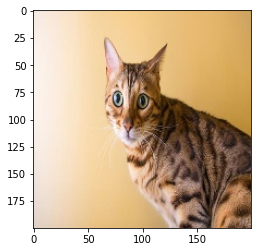

In [29]:
pred_cat=mpimg.imread('Pred/Cat/image0000.jpg') # imread permite ver la imagen
plt.imshow(pred_cat)
plt.show()

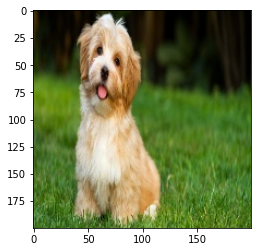

In [44]:
pred_dog=mpimg.imread('Pred/Dog/image0001.jpg') # imread permite ver la imagen
plt.imshow(pred_dog)
plt.show()

In [31]:
test_dir = pathlib.Path('./Pred')
len(list(test_dir.glob('*/*.jpg')))
#test_dir

2

In [32]:
train_ds = tf.keras.utils.image_dataset_from_directory( # image dataset from directory nombra cada elemento con el nombre de la carpeta
  test_dir,
  seed=123,
  image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
  batch_size=BATCH_SIZE)

Found 2 files belonging to 2 classes.


In [34]:
train_ds.class_names

['Cat', 'Dog']

In [33]:
pred=model.predict(train_ds)
pred

1/1 [==============================] - 0s 103ms/step


array([[1.6495987e-04],
       [9.0019351e-01]], dtype=float32)

In [39]:
score_1 = tf.nn.softmax(pred[0])
class_names[np.argmax(score_1)]

'Cat'

In [40]:
score_2 = tf.nn.softmax(pred[1])
class_names[np.argmax(score_2)]

'Cat'

In [41]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_1)], 100 * np.max(score))
)

This image most likely belongs to Cat with a 100.00 percent confidence.


In [42]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_2)], 100 * np.max(score))
)

This image most likely belongs to Cat with a 100.00 percent confidence.


It is observed that the model is not so good at classifying the images as it classified the two images as cat, so it did not recognize the dog in the second images.